In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.patches as mpatches

# Rework in progress, this will be replaced with a pickled file

In [9]:
# Access scaled & Test/Train-Split variables from Notebooks 02 & 03

# Model 1 Variables
%store -r X_test
%store -r Z_train
%store -r Z_test
%store -r y_train
%store -r y_test
%store -r feature_dict
%store -r features

# Model 2 Variables
%store -r Z_train2
%store -r Z_test2
%store -r y_train2
%store -r y_test2
%store -r features2

# Model 3 Variables
%store -r Z_train3
%store -r Z_test3
%store -r y_train3
%store -r y_test3
%store -r features3

# Model 3 Variables
%store -r Z_train4
%store -r Z_test4
%store -r y_train4
%store -r y_test4
%store -r features4

In [3]:
# Check to see that everything is copacetic
X_test.head()

,Year Remod/Add,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Gr Liv Area,Overall Qual
1972,1950,1939,1077,991.0,205.0,1077,5
694,2002,1971,1824,1643.0,739.0,1824,7
906,1972,1972,483,483.0,288.0,987,6
544,1950,1900,1156,1075.0,342.0,1798,4
1846,1985,1940,983,983.0,423.0,1750,6


In [4]:
# Verify dimensions in X and y represent an equal number of observations in each, n = No. of rows
print('Z_test: ', Z_test.shape)
print('y_test: ', y_test.shape)
print('y_pred: ', Z_test['y_pred'].shape)

print('\nZ_test2:', Z_test2.shape)
print('y_test2:', y_test2.shape)

print('\nZ_test3:', Z_test3.shape)
print('y_test3:', y_test3.shape)

Z_test:  (512, 8)
y_test:  (512,)
y_pred:  (512,)

Z_test2: (512, 10)
y_test2: (512,)

Z_test3: (512, 24)
y_test3: (512,)


## Inferential Visualizations
- Look at feature loadings.
- Look at how accurate your predictions are.
- Is there a pattern to your errors? Consider reworking your model to address this.

### LINE Assumptions: Linearity
- y is linearly related to X

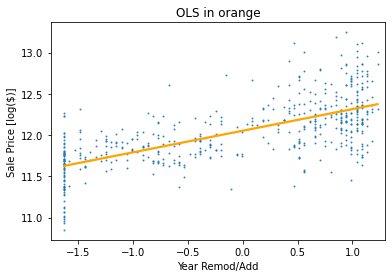

In [19]:
sns.regplot('Year Remod/Add', 'y_pred', Z_test4, ci=None,
            scatter_kws = {'s': 1},
            line_kws = {'color': 'orange'});
#plt.xlim(1949, 2011)
plt.xlim(-1.75, 1.3)
plt.xlabel(f'Year Remod/Add');
plt.ylabel('Sale Price [log($)]');
plt.title(f'OLS in orange');

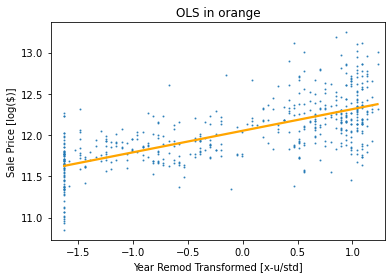

In [18]:
sns.regplot('Year Remod/Add', 'y_pred', Z_test4, ci=None,
            scatter_kws = {'s': 1},
            line_kws = {'color': 'orange'});

plt.xlim(-1.75, 1.3)
plt.xlabel(f'Year Remod Transformed [x-u/std]');
plt.ylabel('Sale Price [log($)]');
plt.title(f'OLS in orange');

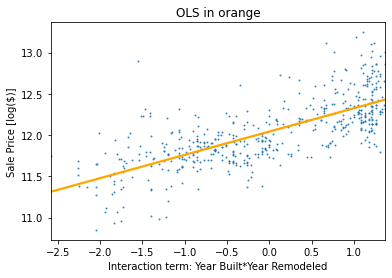

In [23]:
sns.regplot('Year Built/Remod', 'y_pred', Z_test4, ci=None,
            scatter_kws = {'s': 1},
            line_kws = {'color': 'orange'});
#plt.xlim(1882, 2012)
plt.xlabel(f'Interaction term: Year Built*Year Remodeled');
plt.ylabel('Sale Price [log($)]');
plt.title(f'OLS in orange');

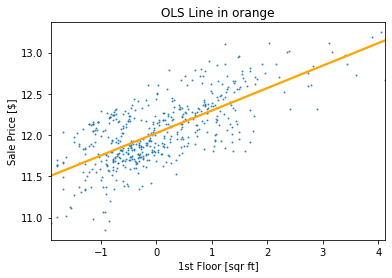

In [26]:
sns.regplot('1st Flr SF', 'y_pred', Z_test4, ci=None,
            scatter_kws = {'s': 1},
            line_kws = {'color': 'orange'});
#plt.xlim(400, 2012)
plt.xlabel(f'1st Floor [sqr ft]');
plt.ylabel('Sale Price [$]');
plt.title(f'OLS Line in orange');

In [ ]:
sns.regplot('Total Bsmt SF', 'y_pred', X_test, ci=None,
            scatter_kws = {'s': 1},
            line_kws = {'color': 'orange'});
plt.xlabel(f'Total Basement [sqr ft]');
plt.ylabel('Sale Price [$]');
plt.title(f'OLS Line in orange');

In [ ]:
sns.regplot('Garage Area', 'y_pred', X_test, ci=None,
            scatter_kws = {'s': 1},
            line_kws = {'color': 'orange'});
plt.xlabel(f'Garage Area [sqr ft]');
plt.ylabel('Sale Price [$]');
plt.title(f'Predicted Sale Price in orange');

In [ ]:
sns.regplot('Gr Liv Area', 'y_pred', X_test, ci=None,
            scatter_kws = {'s': 1},
            line_kws = {'color': 'orange'});
plt.xlabel(f'Above Ground Living Area [sqr ft]');
plt.ylabel('Sale Price [$]');
plt.title(f'Predicted Sale Price in orange');

In [ ]:
sns.regplot('Overall Qual', 'y_pred', X_test, ci=None,
            scatter_kws = {'s': 1},
            line_kws = {'color': 'orange'});
plt.xlim(1, 11)
plt.xlabel(f'Overall Quality');
plt.ylabel('Sale Price [$]');
plt.title(f'OLS Line in Orange');

### LINE Assumptions: Normality of Errors

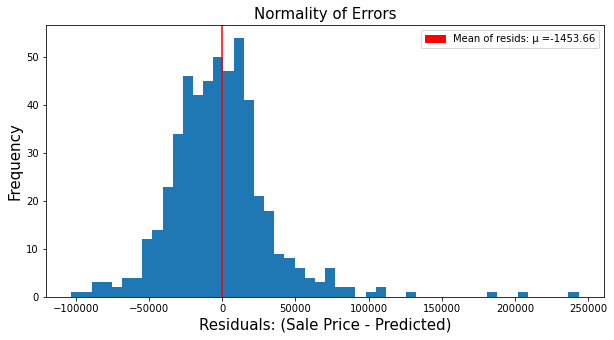

In [37]:
# N - Normality of errors
resids = y_test - Z_test['y_pred']
plt.figure(figsize = (10, 5));
plt.hist(resids, bins=50);
plt.axvline(0,color='red')
plt.xlabel(f'Residuals: (Sale Price - Predicted)', fontsize=15);
plt.ylabel('Frequency', fontsize=15);
plt.title(f'Normality of Errors', fontsize=15);
label_patch = mpatches.Patch(color="red", label=f'Mean of resids: \u03BC ={round(resids.mean(),2)}')
plt.legend(handles=[label_patch]);

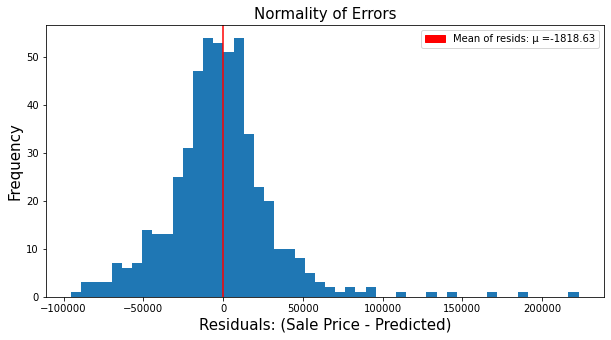

In [36]:
# N - Normality of errors
resids2 = y_test2 - Z_test2['y_pred']
plt.figure(figsize = (10, 5));
plt.hist(resids2, bins=50);
plt.axvline(0,color='red')
plt.xlabel(f'Residuals: (Sale Price - Predicted)', fontsize=15);
plt.ylabel('Frequency', fontsize=15);
plt.title(f'Normality of Errors', fontsize=15);
label_patch = mpatches.Patch(color="red", label=f'Mean of resids: \u03BC ={round(resids2.mean(),2)}')
plt.legend(handles=[label_patch]);

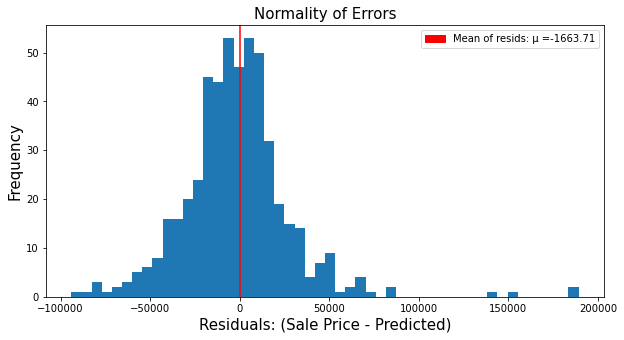

In [35]:
# N - Normality of errors
resids3 = y_test3 - Z_test3['y_pred']
plt.figure(figsize = (10, 5));
plt.hist(resids3, bins=50);
plt.axvline(0,color='red')
plt.xlabel(f'Residuals: (Sale Price - Predicted)', fontsize=15);
plt.ylabel('Frequency', fontsize=15);
plt.title(f'Normality of Errors', fontsize=15);
label_patch = mpatches.Patch(color="red", label=f'Mean of resids: \u03BC ={round(resids3.mean(),2)}')
plt.legend(handles=[label_patch]);

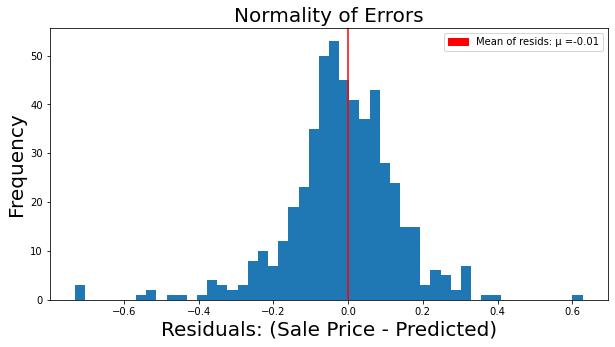

In [59]:
# N - Normality of errors
resids4 = y_test4 - Z_test4['y_pred']
plt.figure(figsize = (10, 5));
plt.hist(resids4, bins=50);
plt.axvline(0,color='red')
plt.xlabel(f'Residuals: (Sale Price - Predicted)', fontsize=20);
plt.ylabel('Frequency', fontsize=20);
plt.title(f'Normality of Errors', fontsize=20);
label_patch = mpatches.Patch(color="red", label=f'Mean of resids: \u03BC ={round(resids4.mean(),2)}')
plt.legend(handles=[label_patch]);

### LINE Assumptions: Equal Variance of Errors

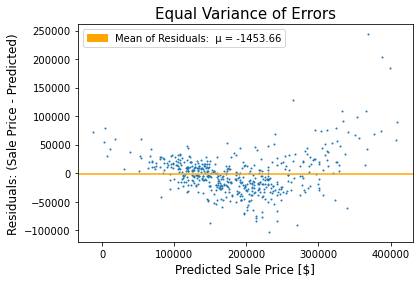

In [41]:
# E-Equal Variance of Errors: errors should have consistent pattern for all X-values, resids should have no relationship w/ X
plt.scatter(Z_test['y_pred'], resids, s=1)

plt.axhline(resids.mean(), color="orange");

plt.xlabel(f'Predicted Sale Price [$]', fontsize=12);
plt.ylabel(f'Residuals: (Sale Price - Predicted)', fontsize=12);
plt.title('Equal Variance of Errors', fontsize=15);

label_patch = mpatches.Patch(color="orange", label=f'Mean of Residuals:  \u03BC = {round(resids.mean(),2)}')
plt.legend(handles=[label_patch]);

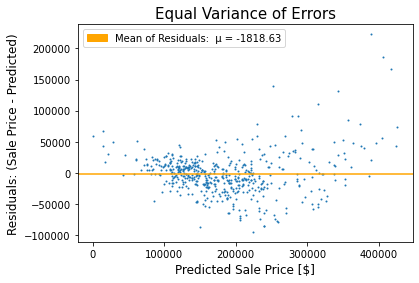

In [43]:
# E-Equal Variance of Errors: errors should have consistent pattern for all X-values, resids should have no relationship w/ X
plt.scatter(Z_test2['y_pred'], resids2, s=1);

plt.axhline(resids2.mean(), color="orange");

plt.xlabel(f'Predicted Sale Price [$]', fontsize=12);
plt.ylabel(f'Residuals: (Sale Price - Predicted)', fontsize=12);
plt.title('Equal Variance of Errors', fontsize=15);

label_patch = mpatches.Patch(color="orange", label=f'Mean of Residuals:  \u03BC = {round(resids2.mean(),2)}');
plt.legend(handles=[label_patch]);

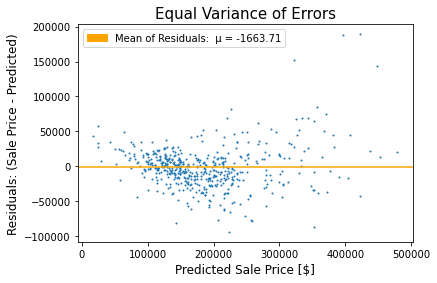

In [45]:
# E-Equal Variance of Errors: errors should have consistent pattern for all X-values, resids should have no relationship w/ X
plt.scatter(Z_test3['y_pred'], resids3, s=1)

plt.axhline(resids3.mean(), color="orange");

plt.xlabel(f'Predicted Sale Price [$]', fontsize=12);
plt.ylabel(f'Residuals: (Sale Price - Predicted)', fontsize=12);
plt.title('Equal Variance of Errors', fontsize=15);

label_patch = mpatches.Patch(color="orange", label=f'Mean of Residuals:  \u03BC = {round(resids3.mean(),2)}')
plt.legend(handles=[label_patch]);

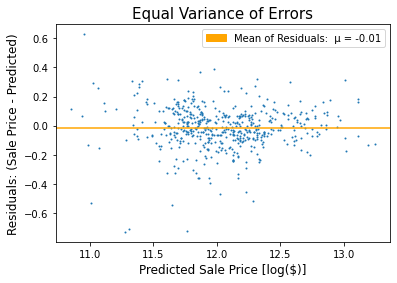

In [54]:
# E-Equal Variance of Errors: errors should have consistent pattern for all X-values, resids should have no relationship w/ X
plt.scatter(Z_test4['y_pred'], resids4, s=1)

plt.axhline(resids4.mean(), color="orange");

plt.xlabel(f'Predicted Sale Price [log($)]', fontsize=12);
plt.ylabel(f'Residuals: (Sale Price - Predicted)', fontsize=12);
plt.title('Equal Variance of Errors', fontsize=15);

label_patch = mpatches.Patch(color="orange", label=f'Mean of Residuals:  \u03BC = {round(resids4.mean(),2)}')
plt.legend(handles=[label_patch]);

#### Evaluation Metrics

In [28]:
def regression_metrics(y, y_pred, k):
    # Set-up
    from sklearn import metrics
    regr_metrics = {}
    if y.shape[0] != y_pred.shape[0]:
        print('Size of prediction mismatch!')
    else:
        # 1. Calculate SSE
        regr_metrics['SSE'] = ( (y - y_pred)**2 ).sum()
        sse = regr_metrics['SSE']
        # 2. Calculate MSE
        regr_metrics['MSE'] = metrics.mean_squared_error(y, y_pred)
        mse = regr_metrics['MSE']
        # 3. Calculate RMSE
        regr_metrics['RMSE'] = metrics.mean_squared_error(y, y_pred, squared = False)
        rmse = regr_metrics['RMSE']
        # 4. Calculate MAE
        regr_metrics['MAE'] = metrics.mean_absolute_error(y, y_pred)
        mae = regr_metrics['MAE']
        # 5. Calculate R2
        regr_metrics['r2'] = metrics.r2_score(y, y_pred)
        r2 = regr_metrics['r2']
        # 6. Calculate R2_adj
        n = y.shape[0]
        a = n-1
        b= 1-r2
        regr_metrics['r2_adj'] = 1 - ( a*b/(a-k) )
        r2_adj = regr_metrics['r2_adj']
        print(f' SSE:  {sse:,.2f}\n',
              f'MSE:  {mse:,.2f}\n',
              f'RMSE: {rmse:,.2f}\n',
              f'MAE:  {mae:,.2f}\n',
              f'r2:   {r2:,.6f}\n',
              f'r2adj:{r2_adj:,.6f}')
        return regr_metrics

In [51]:
# Score it: Evaluate Model 1 locally with training values of Sale Price
metrics = regression_metrics(y_test,Z_test['y_pred'], len(features))

 SSE:  637,635,844,798.67
 MSE:  1,245,382,509.37
 RMSE: 35,289.98
 MAE:  25,007.29
 r2:   0.829431
 r2adj:0.827062


In [50]:
# Score it: Evaluate Model 2 locally with training values of Sale Price
metrics2 = regression_metrics(y_test2,Z_test2['y_pred'], len(features2))

 SSE:  589,112,435,558.27
 MSE:  1,150,610,225.70
 RMSE: 33,920.65
 MAE:  23,465.54
 r2:   0.842411
 r2adj:0.839905


In [49]:
# Score it: Evaluate Model 3 locally with training values of Sale Price
metrics3 = regression_metrics(y_test3,Z_test3['y_pred'], len(features3))

 SSE:  466,164,690,268.91
 MSE:  910,477,910.68
 RMSE: 30,174.13
 MAE:  20,947.36
 r2:   0.875300
 r2adj:0.870484


In [53]:
# Score it: Evaluate Model 3 locally with training values of Sale Price
metrics4 = regression_metrics(y_test4,Z_test4['y_pred'], len(features4))

 SSE:  11.41
 MSE:  0.02
 RMSE: 0.15
 MAE:  0.11
 r2:   0.876108
 r2adj:0.871323


1.161834242728283